*ISPC*

**GRUPO 16**

**Prediccion de alquileres en CABA**

Zorrilla Juan Pedro

**Analisis Exploratorio de Data Frame**

In [93]:
#Importación de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [94]:
#Lectura de DataFrame creado apartir del scrap 
# de Argenprop 10/03/23
df = pd.read_csv ('propiedades_argenprop.csv')
df

,URL,Ubicación,Precio,Sup. cubierta,Antiguedad,Baños,Ambientes,Disposición,Expensas,Dormitorios,...,Cantidad baños,Agua corriente,Tipo de cochera,Tipo de cobertura,Tipo de coche,Tipo de acceso,Altura Techo,FOT,Habitaciones,Descripción
0,https://www.argenprop.com/departamento-en-alqu...,"Humahuca 3400, Piso 4",USD 350,37 m² Cubierta,6 años,1 baño,Monoambiente,Frente,+ $40.000 expensas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.argenprop.com/departamento-en-alqu...,"Pedro J Agrelo 4300, Piso 6",$ 167.000,45 m² Cubierta,38 años,1 baño,2 ambientes,Lateral,+ $31.000 expensas,1 dormitorio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.argenprop.com/departamento-en-alqu...,"Cnel T De Rocamora 4400, Piso 1",$ 190.000,40 m² Cubierta,10 años,1 baño,2 ambientes,Frente,+ $25.000 expensas,1 dormitorio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.argenprop.com/departamento-en-alqu...,"MARIO BRAVO 200, Piso 6",$ 190.000,40 m² Cubierta,50 años,1 baño,2 ambientes,Contra Frente,No se encontraron expensas,1 dormitorio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.argenprop.com/departamento-en-alqu...,"Av B Rivadavia 4100, Piso 13",$ 180.000,40 m² Cubierta,NaN,NaN,2 ambientes,NaN,+ $25.000 expensas,1 dormitorio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,https://www.argenprop.com/casa-en-alquiler-en-...,Av. Alberdi 1062 Casona interna amplias depen...,$ 190.000,150 m² Cubierta,NaN,2 baños,6 ambientes,NaN,No se encontraron expensas,4 dormitorios,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8681,https://www.argenprop.com/departamento-en-alqu...,"Av. Alberdi al 600, vista despejada, impeacbl...",$ 150.000,75 m² Cubierta,30 años,2 baños,4 ambientes,NaN,+ $18.000 expensas,2 dormitorios,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8682,https://www.argenprop.com/departamento-en-alqu...,"Av. Alberdi al 600, vista despejada, impeacbl...",$ 150.000,75 m² Cubierta,30 años,2 baños,4 ambientes,NaN,+ $18.000 expensas,2 dormitorios,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8683,https://www.argenprop.com/oficina-en-alquiler-...,"Sarmiento 800, Piso 11",$ 190.000,176 m² Cubierta,NaN,1 baño,7 ambientes,NaN,+ $125.000 expensas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#vemos la estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  8685 non-null   object 
 1   Ubicación            8685 non-null   object 
 2   Precio               8685 non-null   object 
 3   Sup. cubierta        7168 non-null   object 
 4   Antiguedad           3589 non-null   object 
 5   Baños                7730 non-null   object 
 6   Ambientes            6947 non-null   object 
 7   Disposición          1176 non-null   object 
 8   Expensas             8685 non-null   object 
 9   Dormitorios          6524 non-null   object 
 10  Cocheras             4353 non-null   object 
 11  Estado               2306 non-null   object 
 12  Orientación          1291 non-null   object 
 13  Apto profesional     612 non-null    object 
 14  Toilettes            437 non-null    object 
 15  Permite mascota      59 non-null     o

In [96]:
#Buscamos las columnas y sus nombres
df.columns

Index(['URL', 'Ubicación', 'Precio', 'Sup. cubierta', 'Antiguedad', 'Baños',
       'Ambientes', 'Disposición', 'Expensas', 'Dormitorios', 'Cocheras',
       'Estado', 'Orientación', 'Apto profesional', 'Toilettes',
       'Permite mascota', 'Antigüedad', 'Sup. terreno', 'Toilletes',
       'Tipo de Baño', 'Tipo de local', 'Plantas', 'En Edificio', 'Sup. total',
       'Seguridad', 'Galería/Shopping', 'Sup. descubierta', 'Tipo de Terreno',
       'Sup. Total', 'Longitud del Frente', 'Longitud del Fondo',
       'Superficie Total', 'Sup. Construible', 'Longitud del frente',
       'Longitud del fondo', 'Superficie cubierta', 'Cantidad baños',
       'Agua corriente', 'Tipo de cochera', 'Tipo de cobertura',
       'Tipo de coche', 'Tipo de acceso', 'Altura Techo', 'FOT',
       'Habitaciones', 'Descripción'],
      dtype='object')

**Informacion de cada columnas**

- URL : link de la pagina argenprop de la propiedad
- Precio ARS: precio de la propiedad en pesos
- Precio USD: precio de la propiedad en dolares
- Expensas: indica el valor de los servicios de expensas (el sueldo del encargado del edificio, el pago de los servicios utilizados en espacios comunes como la luz, el gas y el agua, los seguros y otras prestaciones)
- Sup. cubierta [m²]: superficie cubierta en metros cuadrados
- Dormitorios: cantidad de dormitorios
- Baños: cantidad de baños 
- Ambientes: canitdad de ambientes
- Cocheras: cantidad de cocheras
- Sup. terreno [m²]: superficie del terreno en metros cuadrados 
- Antigüedad [años]/Antiguedad: en años de la propiedad
- Estado: condición en la que se encuentra la propiedad (excelente, a estrenar, renovar, entre otros)
- Disposición: hacia que dirección se encuentra orientado (lateral, frente, contrafrente)
- Toilettes:  cantidad de toilettes
- Orientación: hacia donde está orientada la propiedad (Sur, Norte, ESte, Oeste)
- Apto profesional: si se puede utilizar para actrividad profesional
- Sup. total [m²]: superficie total en metros cuadrados (terreno+edficicación) 
- Seguridad: incluye segurida privada 
- Permite mascota: permite mascotas o no
- Plantas: cantidad de plantas/pisos que posee  
- Superficie Total: superficie total de la propeidad (en metros)
- Longitud del Frente: longitud del frente de la propiedad en m2  
- Longitud del Fondo: longitud del fondo de la propiedad en m2 
- Altura Techo: altura del techo en metros 
- Tipo de Baño 
- Tipo de local 
- En Edificio: En edificio 
- Longitud del frente 
- Longitud del fondo 
- Tipo de Terreno 
- Sup. Total 
- Sup. descubierta [m²]  
- Galería/Shopping  
- Agua corriente 
- Tipo de cochera 
- Tipo de cobertura 
- Tipo de coche 
- Tipo de acceso 
- Superficie cubierta  
- FOT: Factor de Ocupación Total y es el coeficiente que determina los máximos m2 que se puede construir 
- Toilletes  
- Sup. Cubierta 
- Pileta 
- Habitaciones 




In [97]:
#Buscamoa la cantidad de valores nulos
df.isnull().sum()



URL                       0
Ubicación                 0
Precio                    0
Sup. cubierta          1517
Antiguedad             5096
Baños                   955
Ambientes              1738
Disposición            7509
Expensas                  0
Dormitorios            2161
Cocheras               4332
Estado                 6379
Orientación            7394
Apto profesional       8073
Toilettes              8248
Permite mascota        8626
Antigüedad             4911
Sup. terreno           6201
Toilletes              8683
Tipo de Baño           8668
Tipo de local          8605
Plantas                8491
En Edificio            8566
Sup. total             8154
Seguridad              8587
Galería/Shopping       8681
Sup. descubierta       8663
Tipo de Terreno        8684
Sup. Total             8684
Longitud del Frente    8669
Longitud del Fondo     8669
Superficie Total       8654
Sup. Construible       8684
Longitud del frente    8622
Longitud del fondo     8623
Superficie cubierta 

In [98]:
#Ante la presencia de estos datos nulos, se procede a trabajar con un nuevo dataframe desarrollado por el equipo

In [99]:
#Almacenamos los datos de nuestro df, para crear a posteriori uno nuevo
df_original = df

**Procesamiento de Datos**

In [100]:
#Para el dataframe desarrollado por el equipo se procedio a

# Excluir las columnas especificadas
#columns_to_exclude = ['Precio ARS', 'Expensas', 'Cocheras','Estado', 'Sup. terreno [m²]', 'Antiguedad [años]', 'URL', 'Ubicación']
#df_nuevo = df_original.drop(columns=columns_to_exclude)

# Completar los valores nulos con la mediana de cada columna
#median_values = df_nuevo.median(numeric_only=True)
#df_clean = df_nuevo.fillna(median_values)

In [101]:
#Leemos e nuevo dataframe creado por el equipo
df = pd.read_csv('df_v2.csv')
df

,URL,Ubicación,Precio ARS,Precio USD,Expensas,Sup. cubierta [m²],Dormitorios,Baños,Ambientes,Cocheras,Sup. terreno [m²],Antiguedad [años],Estado
0,https://www.argenprop.com/casa-en-alquiler-en-...,Honorio Pueyrredón 5500,NaN,1400.000000,NaN,160.0,3.0,2.0,4.0,4.0,1.0,NaN,Bueno
1,https://www.argenprop.com/casa-en-alquiler-en-...,Barrio Los Pilares,NaN,1000.000000,NaN,NaN,2.0,2.0,3.0,2.0,800.0,14.0,Bueno
2,https://www.argenprop.com/departamento-en-alqu...,Av. Balbin 2400,NaN,1100.000000,NaN,76.0,2.0,2.0,3.0,1.0,NaN,11.0,Muy Bueno
3,https://www.argenprop.com/departamento-en-alqu...,Juramento al 1400,NaN,250.000000,17500.0,35.0,NaN,1.0,0.0,NaN,NaN,40.0,Bueno
4,https://www.argenprop.com/casa-en-alquiler-en-...,Village Golf & Tennis,NaN,4000.000000,NaN,330.0,4.0,2.0,6.0,1.0,900.0,0.0,Bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,https://www.argenprop.com/casa-en-alquiler-en-...,Corrientes al 2000,260000.0,236.363636,NaN,250.0,3.0,2.0,8.0,NaN,NaN,50.0,Bueno
7730,https://www.argenprop.com/departamento-en-alqu...,Bv. Oroño al 900,260000.0,236.363636,58800.0,3.0,2.0,2.0,5.0,NaN,NaN,30.0,Bueno
7731,https://www.argenprop.com/casa-en-alquiler-en-...,Centeno al 3200,130000.0,118.181818,NaN,160.0,3.0,2.0,4.0,1.0,102.0,0.0,Bueno
7732,https://www.argenprop.com/departamento-en-alqu...,Avenida Pellegrini 600,80000.0,72.727273,14000.0,35.0,NaN,1.0,0.0,NaN,NaN,55.0,Bueno


In [102]:
#Buscamos ver a detalle el contenido del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URL                 7734 non-null   object 
 1   Ubicación           7734 non-null   object 
 2   Precio ARS          1599 non-null   float64
 3   Precio USD          7734 non-null   float64
 4   Expensas            2911 non-null   float64
 5   Sup. cubierta [m²]  6994 non-null   float64
 6   Dormitorios         6847 non-null   float64
 7   Baños               7734 non-null   float64
 8   Ambientes           7111 non-null   float64
 9   Cocheras            4227 non-null   float64
 10  Sup. terreno [m²]   2507 non-null   float64
 11  Antiguedad [años]   6732 non-null   float64
 12  Estado              7734 non-null   object 
dtypes: float64(10), object(3)
memory usage: 785.6+ KB


In [103]:
#Identificamos con mayor precision las columnas del dataframe
df.columns

Index(['URL', 'Ubicación', 'Precio ARS', 'Precio USD', 'Expensas',
       'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes', 'Cocheras',
       'Sup. terreno [m²]', 'Antiguedad [años]', 'Estado'],
      dtype='object')

In [104]:
# Contar los valores nulos en el DataFrame
null_counts = df.isna().sum()

# Mostrar el recuento de valores nulos para cada columna
print(null_counts)

URL                      0
Ubicación                0
Precio ARS            6135
Precio USD               0
Expensas              4823
Sup. cubierta [m²]     740
Dormitorios            887
Baños                    0
Ambientes              623
Cocheras              3507
Sup. terreno [m²]     5227
Antiguedad [años]     1002
Estado                   0
dtype: int64


In [105]:
#Analizamos los valores en pesos
precio_stats = df['Precio ARS'].describe()
print(precio_stats)

count    1.599000e+03
mean     6.304379e+05
std      6.199137e+06
min      2.200000e+04
25%      1.300000e+05
50%      2.000000e+05
75%      3.087000e+05
max      1.111111e+08
Name: Precio ARS, dtype: float64


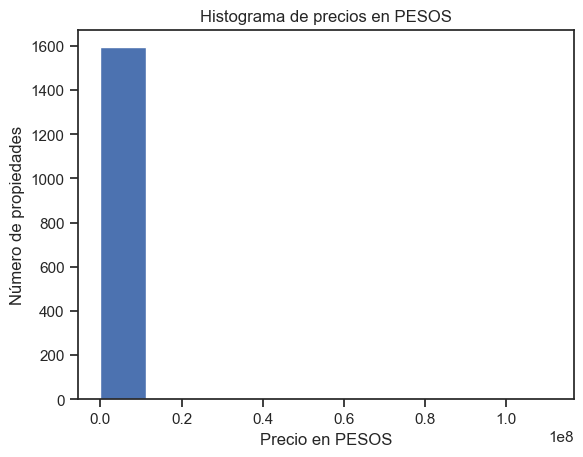

In [106]:
# Obtenga los datos de los precios
precios = df['Precio ARS']

# Creamos un histograma
plt.hist(precios)

# Agregue un título y etiquetas al eje
plt.title('Histograma de precios en PESOS')
plt.xlabel('Precio en PESOS')
plt.ylabel('Número de propiedades')

# Muestre el gráfico
plt.show()


In [107]:
#Analizamos los estadisticos de los precios en dolares
precio_stats = df['Precio USD'].describe()
print(precio_stats)

count    7.734000e+03
mean     2.354299e+03
std      1.569430e+04
min      2.000000e+01
25%      5.000000e+02
50%      1.200000e+03
75%      2.400000e+03
max      1.100000e+06
Name: Precio USD, dtype: float64


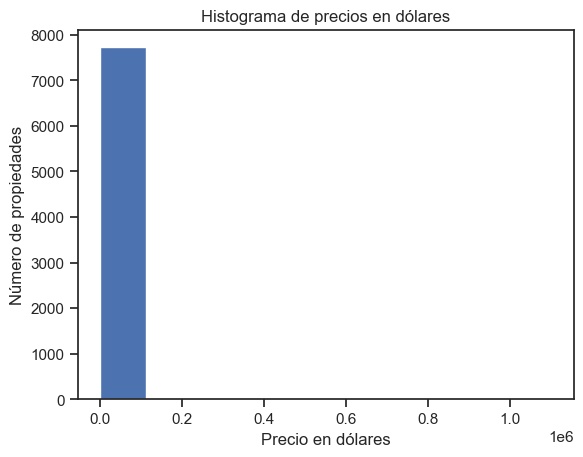

In [108]:
# Tomamos  los datos de los precios en dólares
precios = df['Precio USD']

# Cree un histograma
plt.hist(precios)

# Agregue un título y etiquetas al eje
plt.title('Histograma de precios en dólares')
plt.xlabel('Precio en dólares')
plt.ylabel('Número de propiedades')

# Muestre el gráfico
plt.show()

Al poseer más datos de propiedades en precios de dólares, se ha descartado el uso de las propiedades valuadas en pesos (a demás, las propiedades en pesos poseen gran cantidad de valores nulos, lo que por el momento,  demoraría más el trabajo )

In [109]:
# Excluimos las columnas especificadas
columns_to_exclude = ['Precio ARS', 'Expensas', 'Cocheras','Estado', 'Sup. terreno [m²]', 'Antiguedad [años]', 'URL', 'Ubicación']
df= df.drop(columns=columns_to_exclude)

# Completaamos los valores nulos con la mediana de cada columna
median_values = df.median(numeric_only=True)
df_clean = df.fillna(median_values)

In [110]:
#Revisamos si el dataframe quedo como lo deseamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734 entries, 0 to 7733
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio USD          7734 non-null   float64
 1   Sup. cubierta [m²]  6994 non-null   float64
 2   Dormitorios         6847 non-null   float64
 3   Baños               7734 non-null   float64
 4   Ambientes           7111 non-null   float64
dtypes: float64(5)
memory usage: 302.2 KB


In [111]:
df.columns

Index(['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños',
       'Ambientes'],
      dtype='object')

In [112]:
#como muestra el dataframe y lo que te dictamina el mercado actual
#niguna propiedad ronda, en dolares, a menos de 200 dolares

# Eliminar filas con 'Precio en USD Total' inferior a 200
df = df[df['Precio USD'] >= 200]


In [113]:
# Contar los valores nulos en el DataFrame
null_counts = df.isna().sum()

# Mostrar el recuento de valores nulos para cada columna
print(null_counts)

Precio USD              0
Sup. cubierta [m²]    569
Dormitorios           587
Baños                   0
Ambientes             465
dtype: int64


In [114]:
df = df.dropna()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5655 entries, 0 to 7730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio USD          5655 non-null   float64
 1   Sup. cubierta [m²]  5655 non-null   float64
 2   Dormitorios         5655 non-null   float64
 3   Baños               5655 non-null   float64
 4   Ambientes           5655 non-null   float64
dtypes: float64(5)
memory usage: 265.1 KB


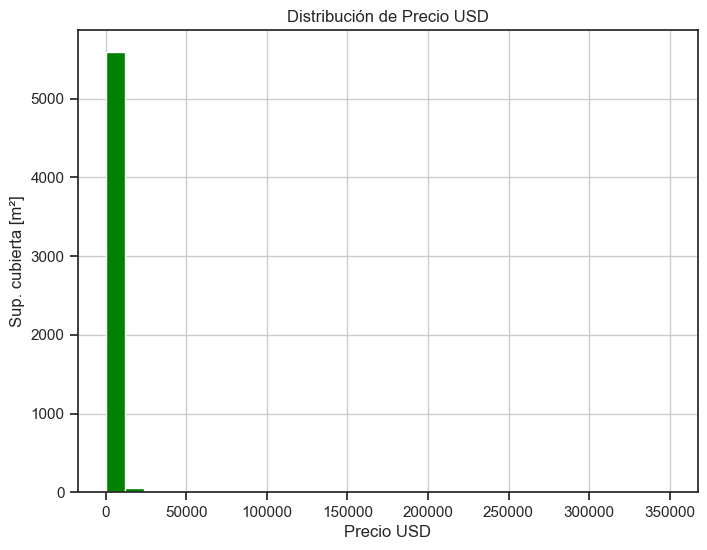

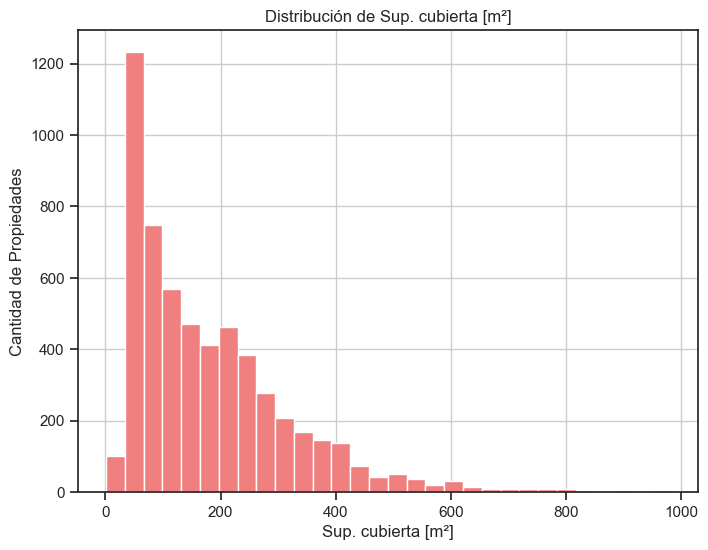

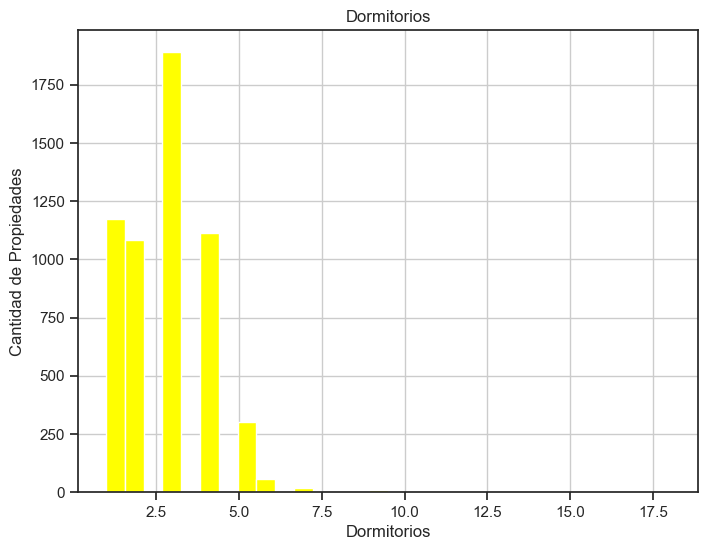

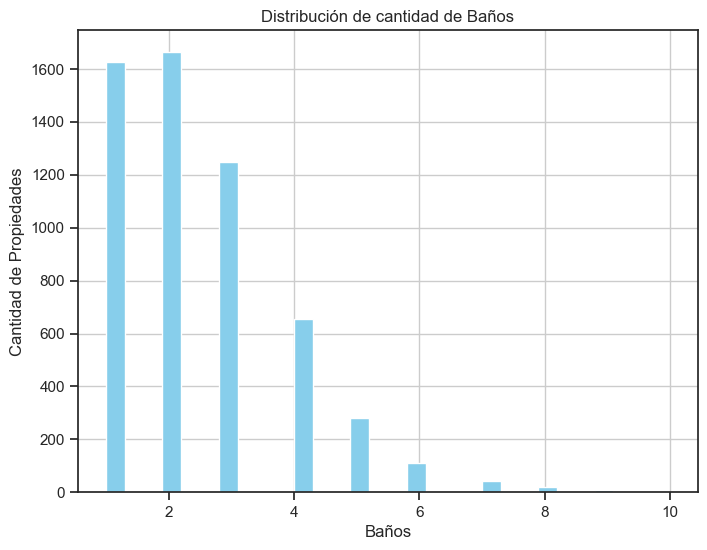

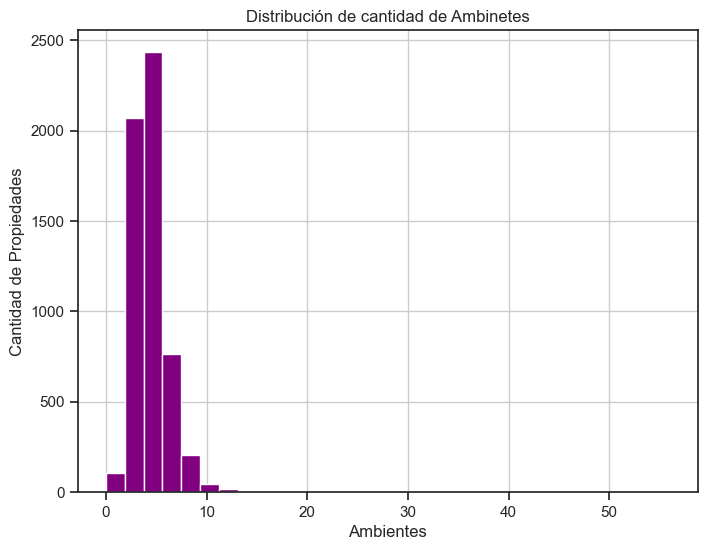

In [123]:
#Visualizamos variables

# Histograma de la variable 'Precio USD'
plt.figure(figsize=(8, 6))
df['Precio USD'].hist(bins=30, color='green')
plt.title('Distribución de Precio USD')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')
plt.show()

# Histograma de la variable 'Sup. cubierta [m²]'
plt.figure(figsize=(8, 6))
df['Sup. cubierta [m²]'].hist(bins=30, color='lightcoral')
plt.title('Distribución de Sup. cubierta [m²]')
plt.xlabel('Sup. cubierta [m²]')
plt.ylabel('Cantidad de Propiedades')
plt.show()

# Histograma de la variable 'Dormitorios'
plt.figure(figsize=(8, 6))
df['Dormitorios'].hist(bins=30, color='yellow')
plt.title('Dormitorios')
plt.xlabel('Dormitorios')
plt.ylabel('Cantidad de Propiedades')
plt.show()

# Histograma de la variable 'Baños'
plt.figure(figsize=(8, 6))
df['Baños'].hist(bins=30, color='skyblue')
plt.title('Distribución de cantidad de Baños')
plt.xlabel('Baños')
plt.ylabel('Cantidad de Propiedades')
plt.show()


# Histograma de la variable 'Ambientes'
plt.figure(figsize=(8, 6))
df['Ambientes'].hist(bins=30, color='purple')
plt.title('Distribución de cantidad de Ambinetes')
plt.xlabel('Ambientes')
plt.ylabel('Cantidad de Propiedades')
plt.show()

**Implementación y evaluacion de modelos**

In [137]:
matriz = df.corr()
print (matriz)


                    Precio USD  Sup. cubierta [m²]  Dormitorios     Baños  \
Precio USD            1.000000            0.170741     0.136926  0.140691   
Sup. cubierta [m²]    0.170741            1.000000     0.726325  0.742384   
Dormitorios           0.136926            0.726325     1.000000  0.734561   
Baños                 0.140691            0.742384     0.734561  1.000000   
Ambientes             0.111037            0.689602     0.825403  0.655628   

                    Ambientes  
Precio USD           0.111037  
Sup. cubierta [m²]   0.689602  
Dormitorios          0.825403  
Baños                0.655628  
Ambientes            1.000000  


<Axes: >

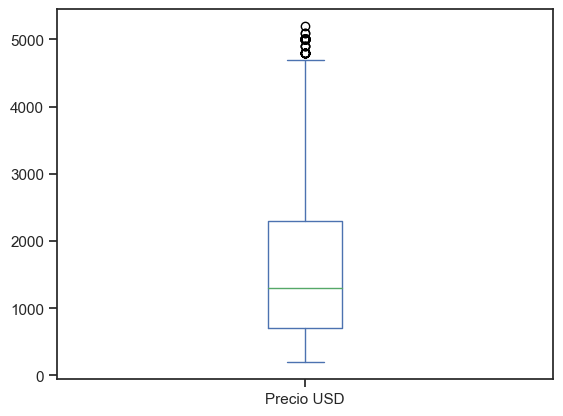

In [227]:
df['Precio USD'].plot.box()

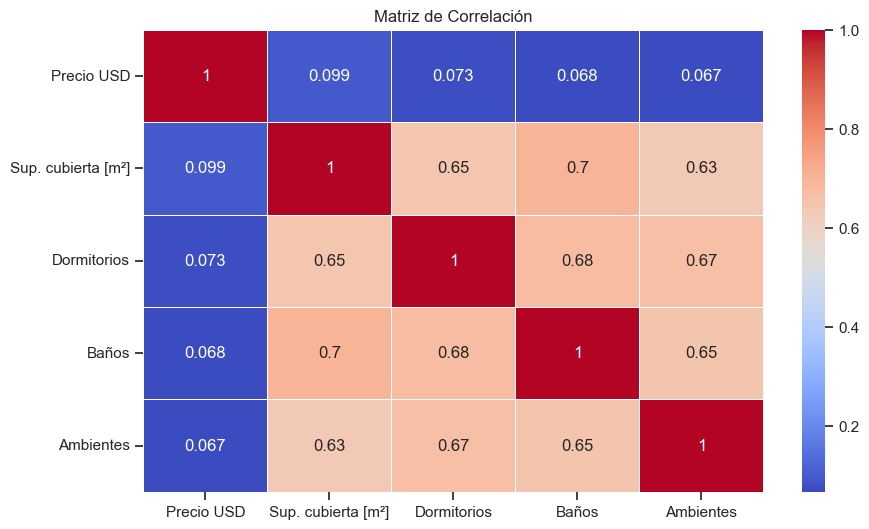

In [138]:
correlation_matrix = df_clean.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


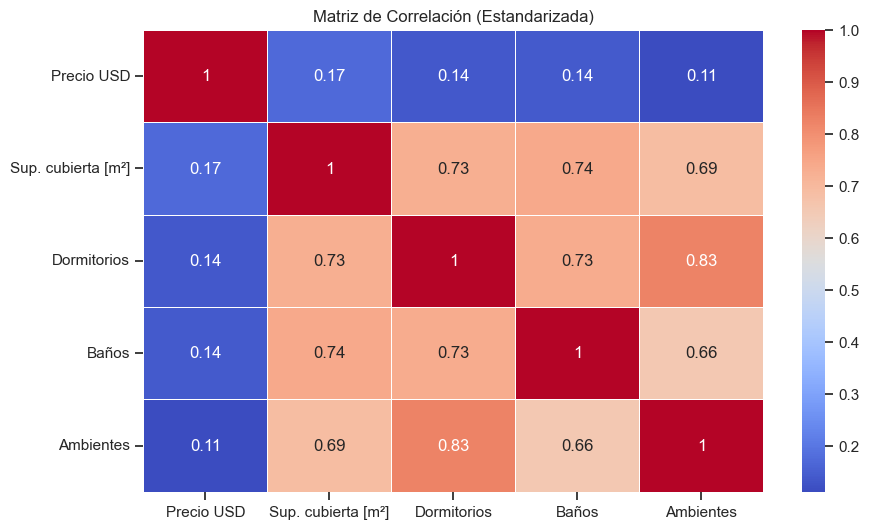

In [141]:
#Procedemos a estandarizar  los datos
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
numeric_columns = ['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']

# Crear una copia del DataFrame solo con las columnas numéricas
df_numeric = df[numeric_columns].copy()

# Estándarizar las variables utilizando Z-score
scaler = StandardScaler()
df_numeric_standardized = scaler.fit_transform(df_numeric)

# Convertir el array estandarizado de nuevo a un DataFrame
df_standardized = pd.DataFrame(df_numeric_standardized, columns=numeric_columns)

# Calcular la matriz de correlación de Pearson
correlation_matrix = df_standardized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (Estandarizada)')
plt.show()


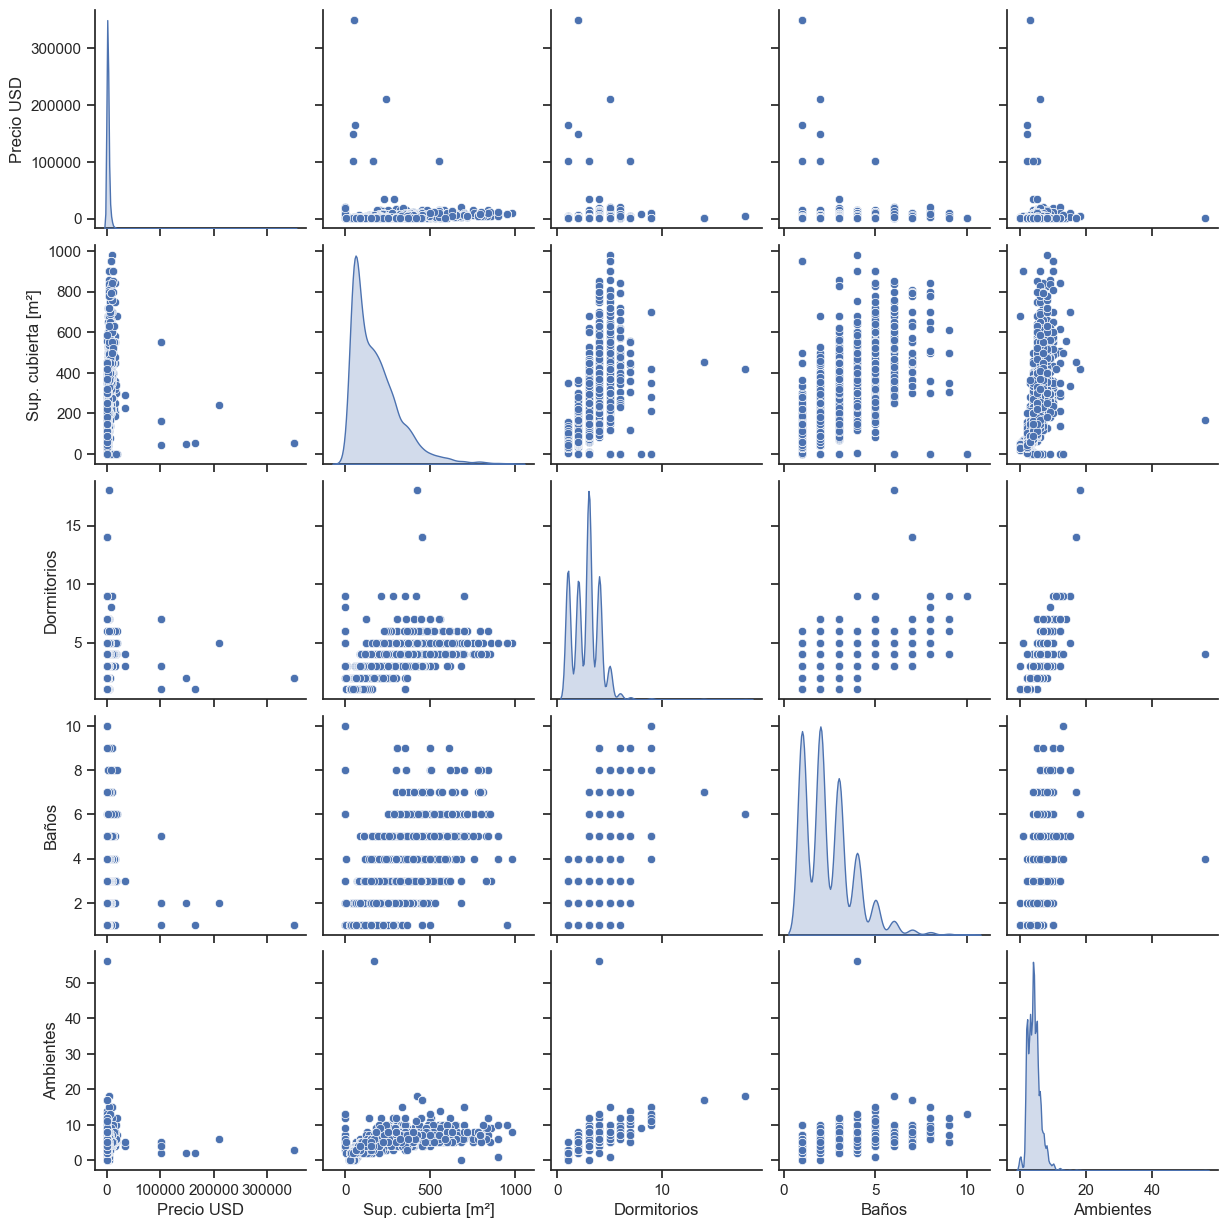

In [145]:
# Seleccionamos las variables numéricas para realizar un pairplot
numeric_columns = ['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']

# Creamos un DataFrame con solo las columnas numéricas
df_numeric = df[numeric_columns]

# Agregamos la variable 'Precio USD' para observarla en el pairplot
df_numeric['Precio USD'] = df['Precio USD']

# Creamos el pairplot
sns.set(style="ticks")
sns.pairplot(df_numeric, kind="scatter", diag_kind="kde")

# Visualizamos el pairplot
plt.show()

Al detectar valorees atipico, vemos que los niveles de correlación podrían mejorar

In [146]:
# Buscamos obtener el rango intercuartil (IQR) de la variable 'Precio USD'
Q1 = df['Precio USD'].quantile(0.25)
Q3 = df['Precio USD'].quantile(0.75)
IQR = Q3 - Q1

# Establecemos un umbral para los valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtramos las observaciones con valores atípicos
df = df[(df['Precio USD'] >= lower_limit) & (df['Precio USD'] <= upper_limit)]

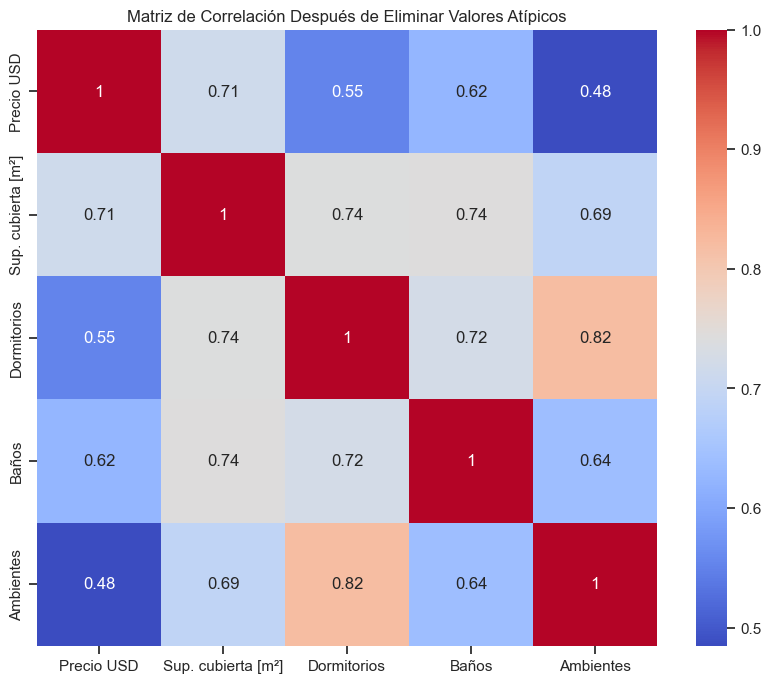

In [147]:
#Procedemos nuevamente a calcular la matriz de correlacion y crear el heatmap
# Cálculo de la matriz de correlación después de eliminar los valores atípicos
correlation_matrix_cleaned = df.corr(numeric_only=True)

# Crear una figura y un eje para mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Después de Eliminar Valores Atípicos')
plt.show()

In [148]:
#Continuamos buscando mayor precision, para ello realziaremos mas ajustes, con transformaciones logaritmicas
# Haremos un nuevo DataFrame con las variables transformadas
df_log_transformed = df[['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes']].apply(np.log1p)

# Renombramos las columnas para indicar que están en escala logarítmica
df_log_transformed.columns = [col + '_log' for col in df_log_transformed.columns]

# Verificamos el nuevo DataFrame
print(df_log_transformed.head())

   Precio USD_log  Sup. cubierta [m²]_log  Dormitorios_log  Baños_log  \
0        7.244942                5.081404         1.386294   1.098612   
2        7.003974                4.343805         1.098612   1.098612   
4        8.294300                5.802118         1.609438   1.098612   
6        8.517393                6.361302         1.791759   1.609438   
7        8.412055                5.942799         1.386294   1.945910   

   Ambientes_log  
0       1.609438  
2       1.386294  
4       1.945910  
6       2.302585  
7       1.609438  


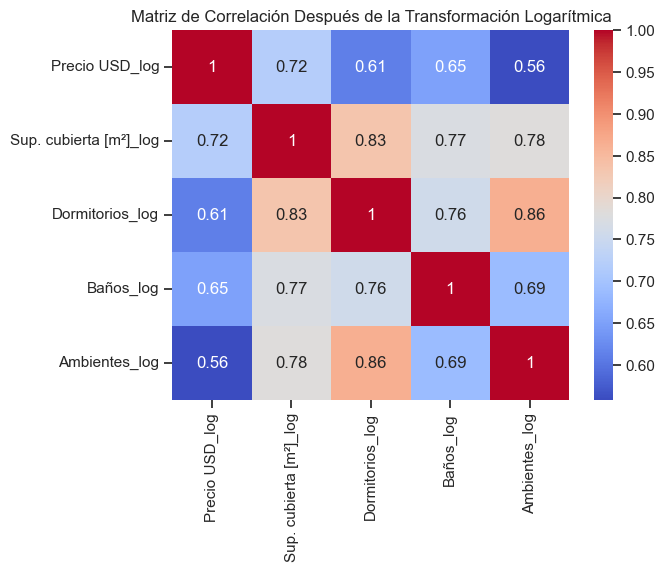

In [149]:
#Nuevamente calculamos la matriz de correlacion y cremos el heatmap
# Calculamos la matriz de correlación
correlation_matrix_log = df_log_transformed.corr()

# Visualizamos la matriz de correlación
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Después de la Transformación Logarítmica')
plt.show()

La correlacion entre el precio en dolares y el resto de las variables ahora se encuentra entre moderadas (0.40-0.50) y muy fuertes (0.80-1.00)

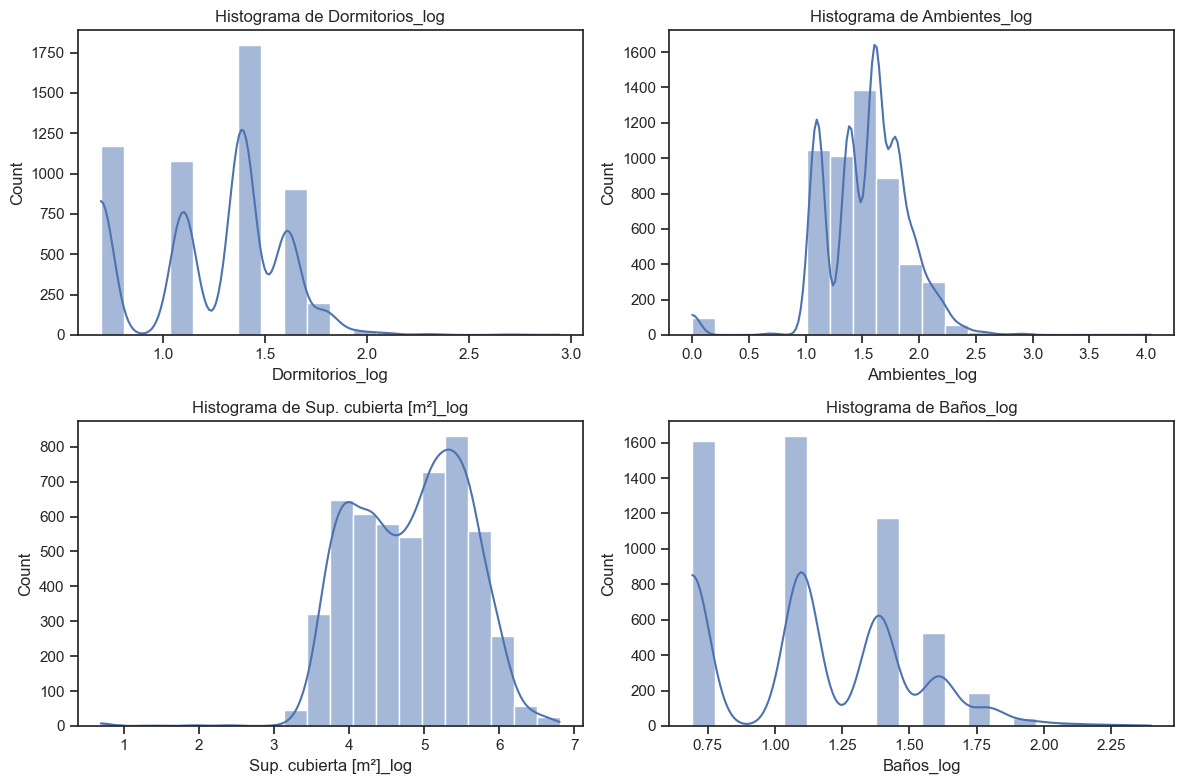

In [150]:
variables = ['Dormitorios_log', 'Ambientes_log', 'Sup. cubierta [m²]_log', 'Baños_log']

# Crear histogramas para las variables logarítmicas
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_log_transformed[var], kde=True, bins=20)
    plt.title(f'Histograma de {var}')

plt.tight_layout()
plt.show()


In [166]:
df_log_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5214 entries, 0 to 7730
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precio USD_log          5214 non-null   float64
 1   Sup. cubierta [m²]_log  5214 non-null   float64
 2   Dormitorios_log         5214 non-null   float64
 3   Baños_log               5214 non-null   float64
 4   Ambientes_log           5214 non-null   float64
dtypes: float64(5)
memory usage: 244.4 KB


In [159]:
#Ajustamos el modelo

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# División de los datos en train y test
X = df_log_transformed[['Sup. cubierta [m²]_log', 'Ambientes_log']]
y = df_log_transformed['Precio USD_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234, shuffle=True)

# Agrega una constante a las variables independientes para estimar el intercepto
X_train = sm.add_constant(X_train, prepend=True)

# Crea y ajusta el modelo de regresión
model = sm.OLS(endog=y_train, exog=X_train)
model = model.fit()

# Imprime el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Precio USD_log   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2244.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:06:25   Log-Likelihood:                -3319.3
No. Observations:                4171   AIC:                             6645.
Df Residuals:                    4168   BIC:                             6664.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Los errores estándar de las estimaciones del modelo asumieron que la matriz de covarianzas de los errores esta especificada correctamente.

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separar las variables independientes (X) de la dependiente (y)
X = df_log_transformed[['Sup. cubierta [m²]_log']]
y = df_log_transformed['Precio USD_log']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')

# Calcular el coeficiente de determinación R^2
r2 = model.score(X_test, y_test)

print(f'Coeficiente de determinación R^2: {r2}')

#Calculamos el precio de la propiedad tomando la superficie
y_pred = model.predict(X_test)
print(f"Precio predicho: ${y_pred[0]:,.2f} USD por metro cuadrado")

Error cuadrático medio: 0.26566736833373905
Coeficiente de determinación R^2: 0.557956754453595
Precio predicho: $7.25 USD por metro cuadrado


El ECM es relativamente bajo, lo que indica que el modelo está bien ajustado a los datos
El coeficiente de determinación R^2   relativamente alto, lo que indica que el modelo explica una gran proporción de la varianza de la variable de salida.
En resumen, los resultados del modelo indican que el modelo está bien ajustado a los datos y que explica una gran proporción de la varianza de la variable de salida.

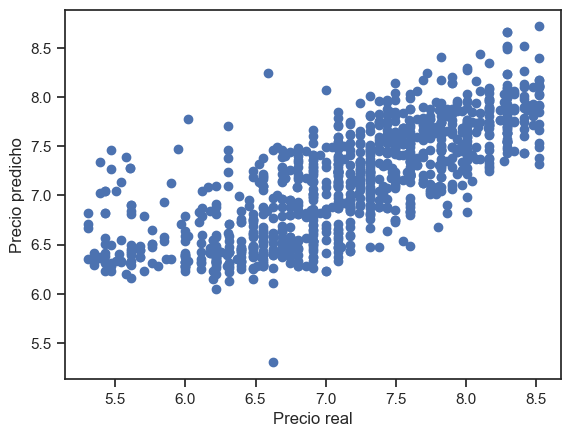

In [194]:
# Visualizar la predicción
plt.scatter(y_test, y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()

In [232]:
#Probamos nuevamente el código
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')

# Calcular el coeficiente de determinación R^2
r2 = model.score(X_test, y_test)

print(f'Coeficiente de determinación R^2: {r2}')

#Calculamos el precio de la propiedad tomando la superficie
y_pred = model.predict(X_test)
print(f"Precio predicho: ${y_pred[0]:,.2f} USD por metro cuadrado")

Error cuadrático medio: 0.2881615892249753
Coeficiente de determinación R^2: 0.510599340021219
Precio predicho: $7.48 USD por metro cuadrado


Teniendo en cuenta que por ley se encuentra prohibida el alquiler de inmuebles en modena extranjero, por lo que se debe convertir los dolares a pesos, es una realidad concreta de nuestro país el alquiler en dolares. Para la venta de inmuebles se toma el dolar ladrillo, el cual ronda 1 usd = 670 $ pesos argentinos.

Por lo que según nuestro modelo, un monoambiente de 40 metros cuadrados estaría al rededor de los 290 usd = 194.300 $. Si buscamos en el portal del cual realizamos el webscrapping, se aproxima a los valores estimados. Sin embargo, es aqui donde nuestro modelo se ve debilitado, ya necesitamos de más variables para poder tener mayor precisión en la predicción del precio, a saber:
- Ubicación (barrio, tipo de barrio, zona)
- Disponibilidad de transporte público
- Servicios Educativos, de recreación (jardines, escuelas, universidades, teatros)

Incorporando más datos como los mencionados con anterioridad, podemos llegar a mejorar nuestro modelo y brindar un informe más certero.